In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [ ]:
#import library
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
file = pd.read_csv('/dataset/output.csv')
positionID = {
    "right":0,
    "left":1,
    "center":2
    }
file.position = [positionID[item] for item in file.position]

In [ ]:
features = file.drop("TagID", axis=1)

In [ ]:
labels = file['TagID'] -1 

In [ ]:
print(labels.unique())

[26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3
  2  1  0]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [ ]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
test_matrix = xgb.DMatrix(data=X_test,label=y_test)

In [ ]:
# declare parameters
params = {
            'objective':'multi:softmax',
            'max_depth': 6,
            'alpha': 10,
            'learning_rate': 0.3,
            'n_estimators':100,
            'num_class':27
        }         
           
nrounds = 20     

In [ ]:
xgb_model = xgb.train(params, data_dmatrix, nrounds)

In [ ]:
xgb_model

In [ ]:
# instantiate the classifier
xgb_cv = xgb.cv(dtrain=data_dmatrix, params=params, metrics = 'mlogloss')


In [ ]:
xgb_cv

,train-mlogloss-mean,train-mlogloss-std,test-mlogloss-mean,test-mlogloss-std
0,0.938475,0.002175,0.938591,0.002641
1,0.751044,0.000782,0.752943,0.001896
2,0.631780,0.001230,0.634096,0.001901
3,0.545547,0.000721,0.547720,0.001555
4,0.481241,0.000981,0.483311,0.001603
5,0.433103,0.000248,0.434501,0.001319
6,0.395573,0.000212,0.397354,0.001407
7,0.365273,0.000346,0.367250,0.001332
8,0.341416,0.000952,0.343003,0.001360
9,0.322184,0.001046,0.323948,0.001420


In [ ]:
xgb_clf = xgb.XGBClassifier(learning_rate=0.3, max_depth=6)

In [ ]:
xgb_clf.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.3,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(learning_rate=0.3, max_depth=6, objective='multi:softprob')

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = xgb_clf.predict(X_test)
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


XGBoost model accuracy score: 0.9911


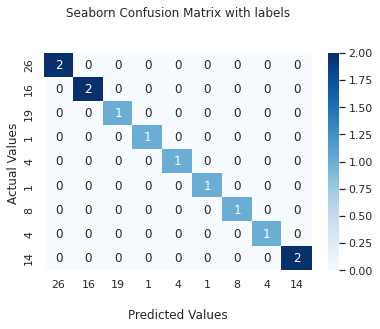

In [ ]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(y_pred)
ax.yaxis.set_ticklabels(y_test)

## Display the visualization of the Confusion Matrix.
plt.show()